# Import files

In [6]:
import sys
sys.path.append("../../ns3_sem")
import sem
import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
ns_path = '../../ns3-dev-hofailure_RACH'
script = 'hofailure_output'
campaign_dir = '../HOF_joiningtimeout_test_Offset'
campaign = sem.CampaignManager.new(ns_path, script, campaign_dir, overwrite=True)
print(campaign)

--- Campaign info ---
script: hofailure_output
params: {'simTime': 250.0, 'numberOfUes': 1.0, 'speed': 2.0, 'handoverAlgorithm': 'A3', 'Hysteresis': 3.0, 'TimeToTrigger': 256.0, 'ServingCellThreshold': 20.0, 'NeighbourCellOffset': 5.0, 'generateRem': False, 'useIdealRrc': False}
HEAD: 9928a550bb1c889c851fe5fbfea8978060eceabe
Runner type: <class 'sem.parallelrunner.ParallelRunner'>
-----------


# Params

In [5]:
param_combination = {'simTime':80, 
                     'numberOfUes': 20, 
                     'speed':1.0,
                     'Hysteresis':3.0,
                     'handoverAlgorithm': 'A3',
                     'TimeToTrigger':256.0,
                     'generateRem':'false',
                     'useIdealRrc':'false',
                     'RngRun': 1
                    }

# Run the simulation

In [9]:
campaign.run_missing_simulations(param_combination, stop_on_errors=False)

Building ns-3: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| [00:06<00:00]
Running simulations: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [08:17<00:00, 24.89s/simulation]


# Analysis the result

In [16]:
def get_average_throughput(result):    
    if result['output']['stderr'] != "":
        num_HOs = -1
        num_RLFs = -1
        num_HFMRs = -1
        num_HFNPs = -1
        num_HFJs = -1
        num_HFLs = -1
    else:
        split_results = result['output']['stdout'].split("\n")
        num_HOs = 0
        num_RLFs = 0
        num_HFMRs = 0
        num_HFNPs = 0
        num_HFJs = 0
        num_HFLs = 0
        for line in split_results:
            event = line.split(":")[0]
            if event == "HO_start":
                num_HOs += 1
            elif event == "Radio link failure detected":
                num_RLFs += 1
            elif event == "Handover Failure Max Rach":
                num_HFMRs += 1
            elif event == "Handover Failure No Preamble":
                num_HFNPs += 1
            elif event == "Handover Failure Joining":
                num_HFJs += 1
            elif event == "Handover Failure Leaving":
                num_HFLs += 1
    return [num_HOs, num_RLFs, num_HFMRs, num_HFNPs, num_HFJs, num_HFLs]

In [17]:
#split_results = result['output']['stdout'].split("\n")
#print(split_results)

# Generate dataframe of the result

In [18]:
results = campaign.get_results_as_dataframe(get_average_throughput, 
                                            ['num_HOs', 'num_RLFs', 'num_HFMRs', 'num_HFNPs', 'num_HFJs', 'num_HFLs'], 
                                            params = param_combination, drop_constant_columns=True)
print(results)

    NeighbourCellOffset  num_HOs  num_HFJs
0                   0.0       33        33
1                   0.1       33        33
2                   0.2       33        33
3                   0.3       33        33
4                   0.4       33        33
5                   0.5       33        33
6                   0.6       33        33
7                   0.7       33        33
8                   0.8       33        33
9                   0.9       33        33
10                  1.0       33        33
11                  1.1       33        33
12                  1.2       33        33
13                  1.3       33        33
14                  1.4       33        33
15                  1.5       33        33
16                  1.6       33        33
17                  1.7       33        33
18                  1.8       33        33
19                  1.9       33        33
20                  2.0       32        31
21                  2.1       32        31
22         

# Plot the result

KeyError: 'num_RLFs'

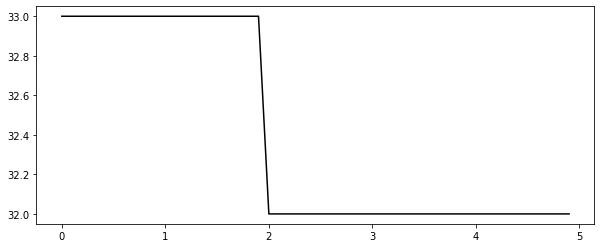

In [19]:
results_ncThr = results
#results[(results['NeighbourCellOffset'] == 0.5)]
fig = plt.figure(figsize=(10, 4))
ax = plt.axes()
ax.plot(results_ncThr['NeighbourCellOffset'], results_ncThr['num_HOs'], color = 'black')
ax.plot(results_ncThr['NeighbourCellOffset'], results_ncThr['num_RLFs'], color = 'red')
ax.plot(results_ncThr['NeighbourCellOffset'], results_ncThr['num_HFNPs'], color = 'blue')
ax.plot(results_ncThr['NeighbourCellOffset'], results_ncThr['num_HFJs'], color = 'green')
ax.grid()
ax.set_xlabel('NeighbourCellOffset')
ax.set_ylabel('Number of HOs, RLFs, HFNPs, HFJs')
ax.set_title('Number of HOs, RLFs, HFNPs, HFJs (ServingCellThreshold = 17.0 dB, speed = 16 m/s)')
ax.legend(['Num_HOs', 'Num_RLFs','Num_HFNPs','Num_HFJs'])